# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
np.random.seed(1)

### Change directory

In [58]:
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/Great Learning/Seq NLP & ACV')

In [7]:
!ls

 daily-minimum-temperatures-in-me.csv  'SeqNLP&ACV_Lab1_Questions.ipynb'
 images_racoon-2.rar		        train_labels.csv


### Load the training data from train.csv file

### Print the shape of the train dataset

In [8]:
train = pd.read_csv('train_labels.csv')

In [10]:
train.shape

(173, 8)

In [11]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [12]:
IMAGE_SIZE = 128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [85]:
import csv
with open("train_labels.csv", "r") as csvfile:
  paths = []
  coords = np.zeros((sum(1 for line in csvfile) - 1, 4))
  spamrecord = csv.reader(csvfile, delimiter=",")
  csvfile.seek(0)
  next(spamrecord, None)
  print(spamrecord)
  for i, row in enumerate (spamrecord):
    for j, r in enumerate (row):
      if((j !=0) & (j !=3)):
        row[j] = int(r)

    path, width, height, class_, xmin, ymin, xmax, ymax = row
    paths.append(path)
    coords[i,0] = int(xmin) * IMAGE_SIZE/int(width)
    coords[i,1] = int(ymin) * IMAGE_SIZE/ int(height)
    coords[i,2] = int(xmax) * IMAGE_SIZE/ int(width)
    coords[i,3] = int(ymax) * IMAGE_SIZE/ int(height)

In [86]:
len(coords)

173

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [ ]:
paths

In [88]:
len(paths)

173

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [65]:
ls

 daily-minimum-temperatures-in-me.csv  'SeqNLP&ACV_Lab1_Questions.ipynb'
 image_files/                           train_labels.csv
 images_racoon-2.rar


In [66]:
!pwd

/content/drive/MyDrive/Great Learning/Seq NLP & ACV


In [67]:
!unrar e "images_racoon-2.rar" "/content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from images_racoon-2.rar


Would you like to replace the existing file /content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/raccoon-1.jpg
 58076 bytes, modified on 2019-04-20 17:52
with a new one
 58076 bytes, modified on 2019-04-15 23:51

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  /content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/raccoon-1.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/raccoon-10.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/raccoon-100.jpg       0%  OK 
Extracting  /content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/raccoon-101.jpg       1%  OK 
Extracting  /content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/raccoon-102.jpg       1%  OK 
Extracting  /content/drive/MyDrive/Great Learnin

In [89]:
from PIL import Image
batch_images = np.zeros((len(paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)

for i, filename in enumerate(paths):
  img = Image.open('/content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/'+filename)
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE));
  img = img.convert("RGB");
  batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))

In [90]:
model = MobileNet(input_shape=(128,128,3), include_top=False, alpha=1.0)

for layer in model.layers:
  layer.trainable = False

x = model.layers[-1].output
x = Conv2D(4, kernel_size=4, name="coords")(x)
x = Reshape((4,))(x)

model = Model(inputs=model.input, outputs=x)

In [82]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                    

### Define a custom loss function IoU which calculates Intersection Over Union

In [71]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def Iou(y_true, y_pred):
    iou = tf.numpy_function(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [91]:
from keras.backend import epsilon

model.compile(optimizer='Adam', loss='mse', metrics=[Iou])
model.fit(batch_images, coords, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
6/6 [==============================] - 4s 310ms/step - loss: 3933.0962 - Iou: 0.0876
Epoch 2/30
6/6 [==============================] - 2s 310ms/step - loss: 730.2834 - Iou: 0.4284
Epoch 3/30
6/6 [==============================] - 2s 307ms/step - loss: 483.2124 - Iou: 0.5802
Epoch 4/30
6/6 [==============================] - 2s 425ms/step - loss: 621.6769 - Iou: 0.5320
Epoch 5/30
6/6 [==============================] - 3s 436ms/step - loss: 347.5941 - Iou: 0.6218
Epoch 6/30
6/6 [==============================] - 4s 614ms/step - loss: 204.1799 - Iou: 0.6587
Epoch 7/30
6/6 [==============================] - 3s 437ms/step - loss: 192.9340 - Iou: 0.6664
Epoch 8/30
6/6 [==============================] - 3s 469ms/step - loss: 159.7413 - Iou: 0.6868
Epoch 9/30
6/6 [==============================] - 3s 510ms/step - loss: 123.5795 - Iou: 0.7387
Epoch 10/30
6/6 [==============================] - 3s 428ms/step - loss: 110.2146 - Iou: 0.7688
Epoch 11/30
6/6 [==============================]

### Pick a test image from the given data

In [101]:
import cv2

filename = '/content/drive/MyDrive/Great Learning/Seq NLP & ACV/image_files/raccoon-99.jpg'
unscaled = cv2.imread(filename)

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [102]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (128, 128))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

### Predict the coordinates of the bounding box for the given test image

In [103]:
region = model.predict(x=np.array([feat_scaled]))[0]

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

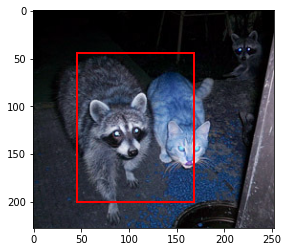

In [104]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

# Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

#### Change your present working directory

In [106]:
!ls

 daily-minimum-temperatures-in-me.csv  'SeqNLP&ACV_Lab1_Questions.ipynb'
 image_files			        train_labels.csv
 images_racoon-2.rar


### Load your data file

In [109]:
import pandas

data = pd.read_csv('daily-minimum-temperatures-in-me.csv', index_col='Date')
data.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Plot data

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]), <a list of 10 Text major ticklabel objects>)

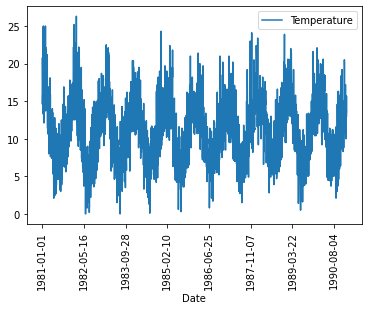

In [111]:
data.plot()
plt.xticks(rotation=90)

#### Descibe your dataframe

In [112]:
data.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [114]:
data.isna().sum()

Temperature    0
dtype: int64

#### Drop null values

In [116]:
data.dropna(inplace=True)

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cf61b76d0>]],
      dtype=object)

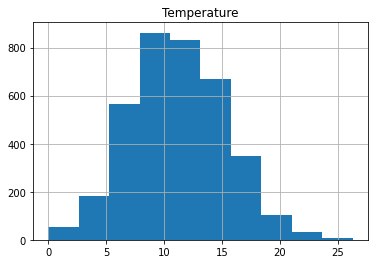

In [117]:
data.hist()

#### Check the maximum and minimum values

In [119]:
import natsort

print('Min', np.min(data))
print('Max', np.max(data))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


### Normalize the data

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)

#### Check the maximum and minimum values of scaled data

In [126]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


#### Look into some of the scaled values

In [127]:
scaled[:10]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046],
       [0.60076046],
       [0.60076046],
       [0.66159696],
       [0.82889734],
       [0.76045627]])

### Split data into Training and Testing

In [128]:
train_size = int(len(scaled) * .7)
test_size = len(scaled - train_size)

train = scaled[0: train_size, :]
test = scaled[train_size: len(scaled), :]

#### Print train and test size

In [129]:
print('train size', len(train))
print('test size', len(test))

train size 2555
test size 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [132]:
def create_dataset(dataset,look_back=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    dataset[i+look_back,0]
    dataX.append(a)
    dataY.append(dataset[i+look_back,0])
  return np.array(dataX),np.array(dataY)

#### Use function to get training and test set

In [148]:
X_train, y_train = create_dataset(train, 1)
X_test, y_test = create_dataset(test, 1)

In [149]:
X_train.shape

(2553, 1)

In [150]:
X_test.shape

(1093, 1)

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [151]:
X_train  = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [152]:
X_train.shape

(2553, 1, 1)

In [153]:
X_test.shape

(1093, 1, 1)

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [154]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

batch_size = 1
look_back = 1 

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

### Summarize your model

In [155]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 4)                    96        
                                                                 
 dense_1 (Dense)             (1, 1)                    5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [156]:
model.fit(X_train, y_train, batch_size=batch_size, verbose=2, epochs=10, shuffle=True)

Epoch 1/10
2553/2553 - 6s - loss: 0.0170 - 6s/epoch - 2ms/step
Epoch 2/10
2553/2553 - 4s - loss: 0.0105 - 4s/epoch - 2ms/step
Epoch 3/10
2553/2553 - 4s - loss: 0.0102 - 4s/epoch - 2ms/step
Epoch 4/10
2553/2553 - 4s - loss: 0.0101 - 4s/epoch - 2ms/step
Epoch 5/10
2553/2553 - 4s - loss: 0.0102 - 4s/epoch - 2ms/step
Epoch 6/10
2553/2553 - 4s - loss: 0.0101 - 4s/epoch - 2ms/step
Epoch 7/10
2553/2553 - 4s - loss: 0.0102 - 4s/epoch - 2ms/step
Epoch 8/10
2553/2553 - 4s - loss: 0.0101 - 4s/epoch - 2ms/step
Epoch 9/10
2553/2553 - 4s - loss: 0.0102 - 4s/epoch - 1ms/step
Epoch 10/10
2553/2553 - 4s - loss: 0.0102 - 4s/epoch - 1ms/step


## Make Predictions and Evaluate your model

In [159]:
train_predict = model.predict(X_train, batch_size=batch_size)

model.reset_states()
test_predict = model.predict(X_test, batch_size=batch_size)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [163]:
import math
from sklearn.metrics import mean_squared_error

train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))

print('Train score RMSE: ', train_score)
print('Test score RMSE: ', test_score)

Train score RMSE:  2.658465148072832
Test score RMSE:  2.5321262731465257


## Plot the results

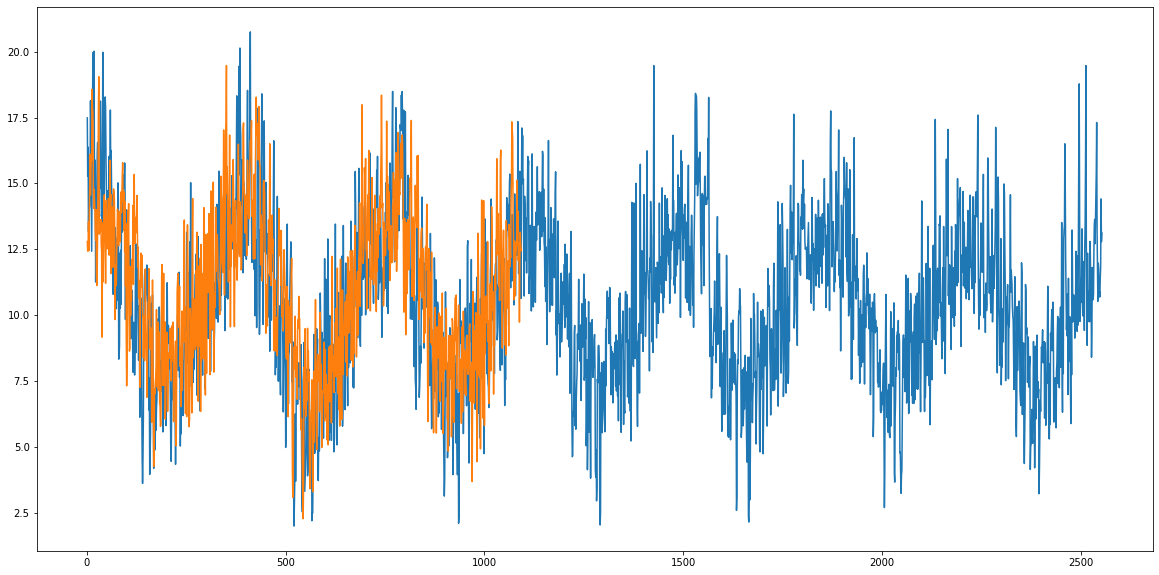

In [166]:
import matplotlib.pyplot as plt

train_predict_plot = np.empty_like(scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back: len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[look_back: len(test_predict) + look_back, :] = test_predict

plt.figure(figsize=(20, 10))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()